<a href="https://colab.research.google.com/github/ftmhrahimi/Deep_Learning_F20_Assignments/blob/master/Assignment_Set_6/Classification/Cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 10
optimizer = Adam()
validation_split = 0.2
verbosity = 1

In [4]:
# Load CIFAR-10 data
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

In [5]:
# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

In [6]:
# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

## **First Model**

In [7]:
# Create the model
import keras
model = Sequential()

model.add(keras.Input(shape=input_shape))  
model.add(Conv2D(32, 5, strides=2, activation="relu"))
model.add(Flatten())
model.add(Dense(no_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 32)        2432      
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                62730     
Total params: 65,162
Trainable params: 65,162
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history_f1 = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=20,
            verbose=verbosity,
            validation_split=validation_split)

Epoch 1/20
800/800 [==============================] - 9s 11ms/step - loss: 1.6320 - accuracy: 0.4231 - val_loss: 1.4197 - val_accuracy: 0.5023
Epoch 2/20
800/800 [==============================] - 9s 11ms/step - loss: 1.3454 - accuracy: 0.5257 - val_loss: 1.3392 - val_accuracy: 0.5278
Epoch 3/20
800/800 [==============================] - 9s 11ms/step - loss: 1.2467 - accuracy: 0.5656 - val_loss: 1.2780 - val_accuracy: 0.5560
Epoch 4/20
800/800 [==============================] - 9s 11ms/step - loss: 1.1764 - accuracy: 0.5907 - val_loss: 1.2647 - val_accuracy: 0.5609
Epoch 5/20
800/800 [==============================] - 9s 11ms/step - loss: 1.1248 - accuracy: 0.6103 - val_loss: 1.2344 - val_accuracy: 0.5711
Epoch 6/20
800/800 [==============================] - 9s 11ms/step - loss: 1.0758 - accuracy: 0.6287 - val_loss: 1.2403 - val_accuracy: 0.5791
Epoch 7/20
800/800 [==============================] - 9s 11ms/step - loss: 1.0333 - accuracy: 0.6428 - val_loss: 1.2206 - val_accuracy: 0.5783

Test loss: 1.3363049030303955 / Test accuracy: 0.5788000226020813


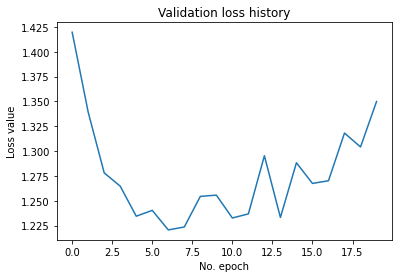

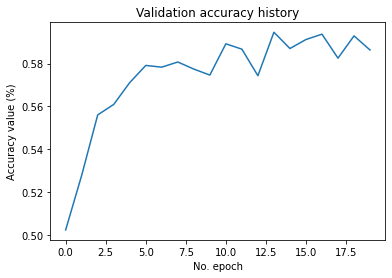

In [9]:
# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history_f1.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history_f1.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

## **First Model with L2 & L1 penalties**

In [10]:
# Create the model
import keras
model = Sequential()

model.add(keras.Input(shape=input_shape))  
model.add(Conv2D(32, 5,kernel_regularizer=keras.regularizers.l2(), strides=2, activation="relu"))
model.add(Flatten())
model.add(Dense(no_classes,kernel_regularizer=keras.regularizers.l1(), activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 32)        2432      
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                62730     
Total params: 65,162
Trainable params: 65,162
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history_f2 = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=20,
            verbose=verbosity,
            validation_split=validation_split)

Epoch 1/20
800/800 [==============================] - 9s 12ms/step - loss: 2.4864 - accuracy: 0.2571 - val_loss: 2.2743 - val_accuracy: 0.2886
Epoch 2/20
800/800 [==============================] - 9s 11ms/step - loss: 2.2489 - accuracy: 0.3036 - val_loss: 2.2477 - val_accuracy: 0.2823
Epoch 3/20
800/800 [==============================] - 9s 12ms/step - loss: 2.2268 - accuracy: 0.3113 - val_loss: 2.2334 - val_accuracy: 0.3231
Epoch 4/20
800/800 [==============================] - 9s 11ms/step - loss: 2.2163 - accuracy: 0.3140 - val_loss: 2.2052 - val_accuracy: 0.3185
Epoch 5/20
800/800 [==============================] - 9s 12ms/step - loss: 2.2086 - accuracy: 0.3210 - val_loss: 2.2297 - val_accuracy: 0.2983
Epoch 6/20
800/800 [==============================] - 9s 12ms/step - loss: 2.2072 - accuracy: 0.3188 - val_loss: 2.2002 - val_accuracy: 0.3385
Epoch 7/20
800/800 [==============================] - 11s 13ms/step - loss: 2.2067 - accuracy: 0.3207 - val_loss: 2.2325 - val_accuracy: 0.304

Test loss: 2.1775436401367188 / Test accuracy: 0.33379998803138733


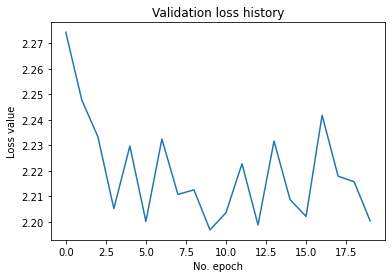

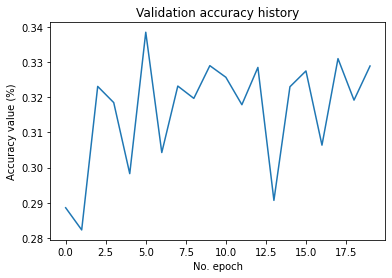

In [12]:
# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history_f2.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history_f2.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

### **First Model with Data Augmentation**

In [13]:
# set up image augmentation
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    #zoom_range=0.3
    )
datagen.fit(input_train)

In [14]:
history_f3=model.fit_generator(datagen.flow(input_train, target_train, batch_size=128),
                    steps_per_epoch = len(input_train) / 128, epochs=20, validation_data=(input_test, target_test))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
391/390 [==============================] - 30s 78ms/step - loss: 2.2004 - accuracy: 0.3128 - val_loss: 2.1807 - val_accuracy: 0.3172
Epoch 2/20
391/390 [==============================] - 30s 77ms/step - loss: 2.2045 - accuracy: 0.3061 - val_loss: 2.1584 - val_accuracy: 0.3383
Epoch 3/20
391/390 [==============================] - 31s 78ms/step - loss: 2.2019 - accuracy: 0.3088 - val_loss: 2.1495 - val_accuracy: 0.3313
Epoch 4/20
391/390 [==============================] - 30s 77ms/step - loss: 2.2021 - accuracy: 0.3082 - val_loss: 2.1590 - val_accuracy: 0.3307
Epoch 5/20
391/390 [==============================] - 30s 78ms/step - loss: 2.2002 - accuracy: 0.3077 - val_loss: 2.1488 - val_accuracy: 0.3415
Epoch 6/20
391/390 [==============================] - 31s 78ms/step - loss: 2.2079 - accuracy: 0.3050 - val_loss: 2.1684 - val_accuracy: 0.3266
Epoch 7/20
391/390 [==============================] - 30s 77

Test loss: 2.1785738468170166 / Test accuracy: 0.32280001044273376


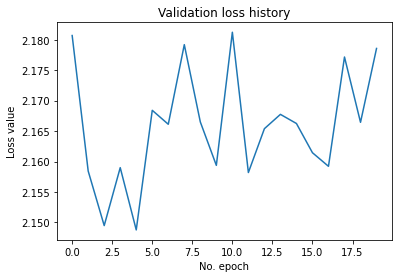

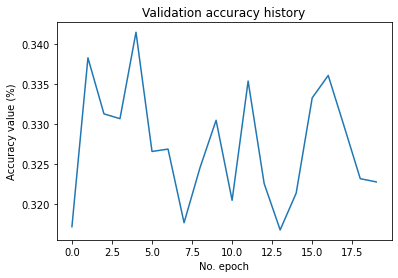

In [15]:
# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history_f3.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history_f3.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

## **Compare Models**

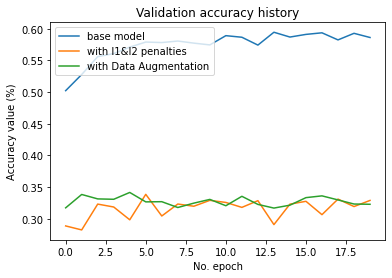

In [16]:
# Plot history: Accuracy
plt.plot(history_f1.history['val_accuracy'])
plt.plot(history_f2.history['val_accuracy'])
plt.plot(history_f3.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.legend(['base model','with l1&l2 penalties','with Data Augmentation'], loc='upper left')
plt.show()

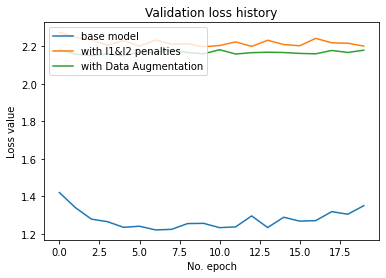

In [17]:
# Plot history: Loss
plt.plot(history_f1.history['val_loss'])
plt.plot(history_f2.history['val_loss'])
plt.plot(history_f3.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(['base model','with l1&l2 penalties','with Data Augmentation'], loc='upper left')
plt.show()

## **Second Model**

In [18]:
# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)              

In [19]:
# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history_s1 = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

Epoch 1/10
800/800 [==============================] - 54s 68ms/step - loss: 1.7549 - accuracy: 0.3456 - val_loss: 1.5229 - val_accuracy: 0.4423
Epoch 2/10
800/800 [==============================] - 54s 68ms/step - loss: 1.3959 - accuracy: 0.4897 - val_loss: 1.3566 - val_accuracy: 0.5129
Epoch 3/10
800/800 [==============================] - 54s 68ms/step - loss: 1.2893 - accuracy: 0.5335 - val_loss: 1.3231 - val_accuracy: 0.5294
Epoch 4/10
800/800 [==============================] - 54s 68ms/step - loss: 1.2231 - accuracy: 0.5617 - val_loss: 1.2291 - val_accuracy: 0.5644
Epoch 5/10
800/800 [==============================] - 55s 68ms/step - loss: 1.1629 - accuracy: 0.5831 - val_loss: 1.2078 - val_accuracy: 0.5753
Epoch 6/10
800/800 [==============================] - 54s 67ms/step - loss: 1.1202 - accuracy: 0.6014 - val_loss: 1.1846 - val_accuracy: 0.5781
Epoch 7/10
800/800 [==============================] - 54s 67ms/step - loss: 1.0860 - accuracy: 0.6130 - val_loss: 1.1512 - val_accuracy:

Test loss: 1.0525051355361938 / Test accuracy: 0.6919000148773193


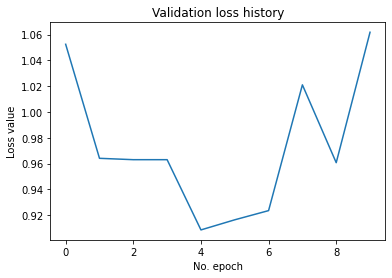

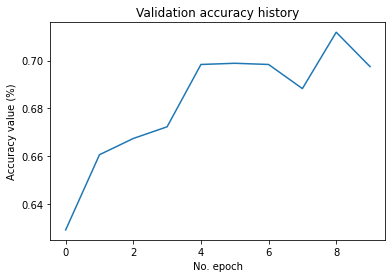

In [ ]:
 # Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history_s1.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history_s1.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

## **Second Model with L2 & L1 penalties**

In [20]:
# Create the model
model = Sequential()
model.add(Conv2D(32,kernel_regularizer='l1_l2', kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_regularizer='l1_l2',kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128,kernel_regularizer='l1_l2', kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256,kernel_regularizer='l1_l2', activation='relu'))
model.add(Dense(128,kernel_regularizer='l1_l2', activation='relu'))
model.add(Dense(no_classes, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)              

In [21]:
# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history_s2 = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

Epoch 1/10
800/800 [==============================] - 57s 71ms/step - loss: 4.2823 - accuracy: 0.0971 - val_loss: 2.7250 - val_accuracy: 0.0952
Epoch 2/10
800/800 [==============================] - 57s 71ms/step - loss: 2.6856 - accuracy: 0.0982 - val_loss: 2.6568 - val_accuracy: 0.0952
Epoch 3/10
800/800 [==============================] - 57s 72ms/step - loss: 2.6517 - accuracy: 0.0997 - val_loss: 2.6467 - val_accuracy: 0.0980
Epoch 4/10
800/800 [==============================] - 57s 71ms/step - loss: 2.6409 - accuracy: 0.0997 - val_loss: 2.6371 - val_accuracy: 0.1016
Epoch 5/10
800/800 [==============================] - 57s 71ms/step - loss: 2.6351 - accuracy: 0.0982 - val_loss: 2.6307 - val_accuracy: 0.1003
Epoch 6/10
800/800 [==============================] - 57s 71ms/step - loss: 2.6326 - accuracy: 0.0966 - val_loss: 2.6311 - val_accuracy: 0.0977
Epoch 7/10
800/800 [==============================] - 57s 71ms/step - loss: 2.6314 - accuracy: 0.0997 - val_loss: 2.6266 - val_accuracy:

Test loss: 2.626974105834961 / Test accuracy: 0.10000000149011612


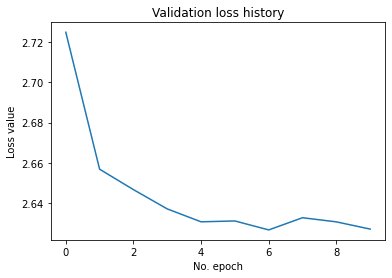

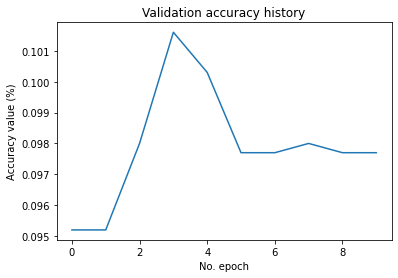

In [22]:
 # Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history_s2.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history_s2.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

## **Second Model with Data Augmentation**

In [23]:
history_s3=model.fit_generator(datagen.flow(input_train, target_train, batch_size=128),
                    steps_per_epoch = len(input_train) / 128, epochs=20, validation_data=(input_test, target_test))

Epoch 1/20
391/390 [==============================] - 81s 206ms/step - loss: 2.6305 - accuracy: 0.0970 - val_loss: 2.6321 - val_accuracy: 0.1000
Epoch 2/20
391/390 [==============================] - 81s 206ms/step - loss: 2.6305 - accuracy: 0.0982 - val_loss: 2.6332 - val_accuracy: 0.1000
Epoch 3/20
391/390 [==============================] - 81s 207ms/step - loss: 2.6305 - accuracy: 0.0961 - val_loss: 2.6285 - val_accuracy: 0.1000
Epoch 4/20
391/390 [==============================] - 80s 206ms/step - loss: 2.6304 - accuracy: 0.0972 - val_loss: 2.6310 - val_accuracy: 0.1000
Epoch 5/20
391/390 [==============================] - 81s 207ms/step - loss: 2.6304 - accuracy: 0.0974 - val_loss: 2.6262 - val_accuracy: 0.1000
Epoch 6/20
391/390 [==============================] - 81s 206ms/step - loss: 2.6305 - accuracy: 0.0976 - val_loss: 2.6336 - val_accuracy: 0.1000
Epoch 7/20
391/390 [==============================] - 81s 207ms/step - loss: 2.6304 - accuracy: 0.0979 - val_loss: 2.6313 - val_ac

Test loss: 2.6276681423187256 / Test accuracy: 0.10000000149011612


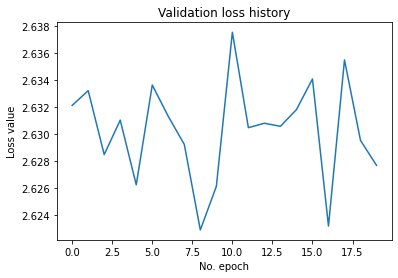

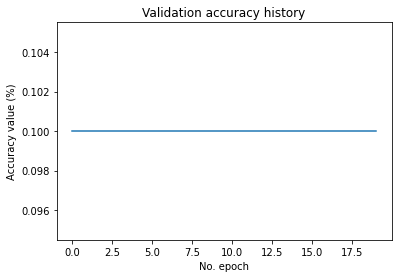

In [24]:
 # Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history_s3.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history_s3.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

## Compare Models

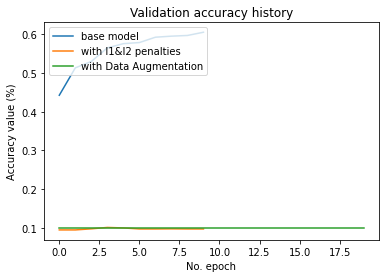

In [25]:
# Plot history: Accuracy
plt.plot(history_s1.history['val_accuracy'])
plt.plot(history_s2.history['val_accuracy'])
plt.plot(history_s3.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.legend(['base model','with l1&l2 penalties','with Data Augmentation'], loc='upper left')
plt.show()

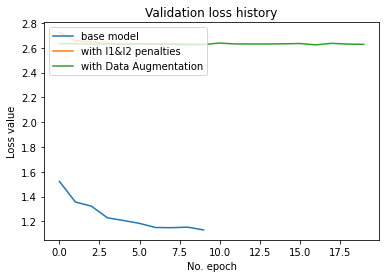

In [26]:
# Plot history: Loss
plt.plot(history_s1.history['val_loss'])
plt.plot(history_s2.history['val_loss'])
plt.plot(history_s3.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(['base model','with l1&l2 penalties','with Data Augmentation'], loc='upper left')
plt.show()